In [1]:
!pip install graphviz
!pip install transformers
!pip install bert
!pip install bert-tensorflow
!pip install keras
!pip install dask_ml
!pip install xgboost
!pip install datascroller
!pip install tensorflow

  Using cached transformers-4.3.3-py3-none-any.whl (1.9 MB)
  Using cached sacremoses-0.0.43-py3-none-any.whl
  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)
  Using cached tokenizers-0.10.1-cp38-cp38-manylinux2010_x86_64.whl (3.2 MB)
  Using cached bert-2.2.0-py3-none-any.whl
  Using cached erlastic-2.0.0-py3-none-any.whl
  Using cached bert_tensorflow-1.0.4-py2.py3-none-any.whl (64 kB)
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
     |████████████████████████████████| 4.5 MB 7.4 MB/s eta 0:00:01
  Using cached dask_ml-1.8.0-py3-none-any.whl (141 kB)
  Using cached dask_glm-0.2.0-py2.py3-none-any.whl (12 kB)
  Using cached xgboost-1.3.3-py3-none-manylinux2010_x86_64.whl (157.5 MB)
  Using cached datascroller-1.4.1-py3-none-any.whl
  Using cached pandasql-0.7.3-py3-none-any.whl
  Using cached SQLAlchemy-1.3.23-cp38-cp38-manylinux2010_x86_64.whl (1.3 MB)
  Using cached tensorflow-2.4.1-cp38-cp38-manylinux2010_x86_64.whl (394.4 MB)
  Using cached protobuf-3.15.3-cp38

In [17]:
!pip install numpy

In [2]:
# Import relevant packages
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pickle
import time
import timeit

# Import dask packages
# import dask.dataframe as ddf
from math import nan
import panel as pn
import dask
import dask.array as da
import dask.dataframe as dd
from dask.delayed import delayed
import seaborn as sns
import matplotlib.pyplot as plt
from dask_ml.model_selection import train_test_split
import graphviz
from datascroller import scroll

from dask.diagnostics import ProgressBar
ProgressBar().register()

# text processing libraries
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

import json
import os
import sys
import glob
import tensorflow as tf

import transformers as ppb
from time import time
import io
import re
from csv import reader

import bert
# from bert import run_classifier
# from bert import optimization
from bert import tokenization
from transformers import RobertaTokenizer, TFRobertaModel

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from tensorflow import keras
#### if use tensorflow=2.0.0, then import tensorflow.keras.model_selection 
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.backend import sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



from datetime import datetime

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Install BERT and BERT Tokenizer from the HuggingFace Transformers library.

We can easily switch between variants of BERT by changing out which model we import from HuggingFace; the rest of the code just flows unchanged.

In [ ]:
# For DistilBERT:
# model_class, tokenizer_class, pretrained_weights = (ppb.TFDistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.TFBertModel, ppb.BertTokenizer, 'bert-base-uncased')

## For BERT Large, use this:
# model_class, tokenizer_class, pretrained_weights = (ppb.AutoModelWithLMHead, ppb.AutoTokenizer, 'bert-large-uncased')
# from transformers import AutoTokenizer, AutoModelWithLMHead

# For ROBERTa base model, use this:
# model_class, tokenizer_class, pretrained_weights = (ppb.TFRobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

## Let's do an initial import on the sample dataset Padma created for HS4 codes 8712 and 8714

In [2]:
!ls /data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter

hs_code_chap_to_keep.csv  sample_chap_39.parq  sample_chap_74.parq
sample_chap_10.parq	  sample_chap_40.parq  sample_chap_75.parq
sample_chap_11.parq	  sample_chap_47.parq  sample_chap_76.parq
sample_chap_12.parq	  sample_chap_48.parq  sample_chap_78.parq
sample_chap_13.parq	  sample_chap_49.parq  sample_chap_79.parq
sample_chap_14.parq	  sample_chap_50.parq  sample_chap_80.parq
sample_chap_15.parq	  sample_chap_51.parq  sample_chap_81.parq
sample_chap_16.parq	  sample_chap_52.parq  sample_chap_82.parq
sample_chap_17.parq	  sample_chap_53.parq  sample_chap_83.parq
sample_chap_18.parq	  sample_chap_54.parq  sample_chap_84.parq
sample_chap_19.parq	  sample_chap_55.parq  sample_chap_85.parq
sample_chap_20.parq	  sample_chap_56.parq  sample_chap_86.parq
sample_chap_21.parq	  sample_chap_57.parq  sample_chap_87.parq
sample_chap_22.parq	  sample_chap_58.parq  sample_chap_88.parq
sample_chap_28.parq	  sample_chap_59.parq  sample_chap_89.parq
sample_chap_29.parq	  sample_chap_60.parq  sample_c

In [3]:
# first sample
# import_df = dd.read_parquet('/data/common/trade_data/2019/data_samples/sample_87128714.parq', engine='fastparquet', chunksize="100MB")

# updated sample with the multple hs codes entries removed
# import_df = dd.read_parquet('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_ignore_multiple_hscode_chap39_40.parq', engine='fastparquet', chunksize="100MB")
files = glob.glob('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_1*.parq')
import_df = pd.concat([pd.read_parquet(fp) for fp in files])

# import_df = pd.read_parquet('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter')

In [4]:
files

['/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_15.parq',
 '/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_17.parq',
 '/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_12.parq',
 '/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_10.parq',
 '/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_14.parq',
 '/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_11.parq',
 '/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_16.parq',
 '/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_19.parq',
 '/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sampl

In [4]:
import_df.columns

Index(['System Identity Id', 'Estimate Arrival Date', 'Actual Arrival Date',
       'Bill of Lading', 'Master Bill of Lading', 'Bill Type Code',
       'Carrier SASC Code', 'Vessel Country Code', 'Vessel Code',
       'Vessel Name', 'Voyage', 'Inbond Type', 'Manifest No',
       'Mode of Transportation', 'Loading Port', 'Last Vist Foreign Port',
       'US Clearing District', 'Unloading Port', 'Place of Receipt', 'Country',
       'Country Sure Level', 'Weight in KG', 'Weight', 'Weight Unit', 'TEU',
       'Quantity', 'Quantity Unit', 'Measure in CM', 'Measure', 'Measure Unit',
       'Container Id', 'Container Size', 'Container Type',
       'Container Desc Code', 'Container Load Status',
       'Container Type of Service', 'Shipper Name', 'Shipper Address ',
       'Raw Shipper Name', 'Raw Shipper Addr1', 'Raw Shipper Addr2',
       'Raw Shipper Addr3', 'Raw Shipper Addr4', 'Raw Shipper Addr Others',
       'Consignee Name', 'Consignee Address ', 'Raw Consignee Name',
       'Raw Con

In [14]:
# Don't truncate text fields in the display
pd.set_option("display.max_colwidth", -1)

import_df.head(2)

,System Identity Id,Estimate Arrival Date,Actual Arrival Date,Bill of Lading,Master Bill of Lading,Bill Type Code,Carrier SASC Code,Vessel Country Code,Vessel Code,Vessel Name,...,Marks & Numbers,HS Code,HS Code Sure Level,CIF,Indicator of true supplier,Indicator of true buyer,END,Cleaned_HS_Code,HS_Code,Merged_Description
193322,6003201908300000674681,20190828,20190829,ZIMUTRT0102730,None,R,"ZIMU, ZIM ISRAEL NAVIGATION CO",SG,9366500,ASIATIC HORIZON,...,NO MARKS<br/>,150110,8,533600.0,Y,Y,END,150110,150110,"Pig fat (including lard) and poultry fat, other than that of heading 0209 or 1503 ;Lard"
489756,6003201904090000598510,20190408,20190408,TSCW13645275,None,R,"TSCW, TROPICAL SHIPPING & CONSTRUCTION CO",PA,9809904,TROPIC HOPE,...,BSIU9477265<br/>,150110,8,0.0,Y,Y,END,150110,150110,"Pig fat (including lard) and poultry fat, other than that of heading 0209 or 1503 ;Lard"


In [5]:
len(import_df.index)

104866

In [6]:
df1 = import_df[['Product Desc', 'Cleaned_HS_Code']]
df1.columns = ['Desc', 'HSCode']
print(df1.head(2))
print(len(df1))

                                                     Desc  HSCode
193322  SUPREME ALL PURPOSE LARD IN PAILS 37LBS CAED N...  150110
489756  SLAC: 840 PAILS NABORI ALL PURPOSE LARD HS COD...  150110
104866


In [7]:
hs_code_desc = import_df[['Cleaned_HS_Code', 'Merged_Description']]
hs_code_desc = hs_code_desc.drop_duplicates()
hs_code_desc.columns = ['HSCode', 'Desc']
print(hs_code_desc.head(2))
print(len(hs_code_desc))

        HSCode                                               Desc
193322  150110  Pig fat (including lard) and poultry fat, othe...
485667  150120  Pig fat (including lard) and poultry fat, othe...
247


In [8]:
df1 = df1.append(hs_code_desc[['Desc', 'HSCode']]).reset_index()
len(df1)

105113

In [7]:
# convert the dataframes back to pandas

# df1_pd = df1.compute()
# len(df1_pd)

In [9]:
df1_pd = df1

Remove long number sequences (that potentially contain HS Codes) from the descriptions.

In [9]:
df1_pd['Desc'] = [re.sub('\d{4,}', '', x) for x in df1_pd['Desc']]

### Let's tokenize the description fields.

#### Create embeddings with nltk

In [ ]:
# def tokenize(data, column_name):
#     '''
#     Tokenize text
#     '''
#     tokens = data[column_name].apply((lambda x: nltk.word_tokenize(x)))
    
#     data['NLTK'+column_name] = np.array(tokens)
    
#     return data
# #     return list(
# #         filter(lambda word: word.isalnum(), tokens)
# #     )

# stop_words = stopwords.words("english")

# def remove_stopwords(words):
#     '''
#     Remove stop words from the list of words
#     '''
    
#     filtered = filter(lambda word: word not in stop_words, words)
    
#     return list(filtered)

#### Create embeddings with BERT

In [ ]:
# def pre_process(data, column_name, max_length):
#     """
#     Function takes inputs:
#     - data in the form of a pandas dataframe
#     - column_name containing the text to be embedded
#     - max length
#     and produces as output the input data BERT requires as an array consisting of:
#     - Sentence IDs padded to the max length
#     - BERT Masks that tell BERT which of the Sentence IDs are 0 and should be ignored
#     - SequenceIDs which are all 0 for our classification task
#     """
#     # Tokenize each item and add the special beginning/end tokens
#     tokenized = data[column_name].apply((lambda x: tokenizer.encode(x, add_special_tokens=False, max_length=max_length, truncation=True)))
#     data['BERT_'+column_name] = np.array(tokenized)
# #     data['BERT_'+column_name] = tokenized
      
# #     # Create the padding based on the max length so all are same shape
# #     bertSentenceIDs = np.array([i + [0]*(max_length-len(i)) for i in tokenized.values])
    
# #     # Create the attention mask so BERT knows which contain values and which are 0s that should be ignored
# #     bertMasks = np.where(bertSentenceIDs != 0, 1, 0)

# #     # Create the BERT sequence IDs. In this case they are all 0 since it's the same sentence input.
# #     bertSequenceIDs = np.array([np.zeros(max_length) for i in tokenized.values], dtype=int)
    
# #     # Create and return the data array containing both the padded and the attention mask
# #     X_data = np.array([bertSentenceIDs, bertMasks, bertSequenceIDs])

# #     # Also look at the vocabulary size in the tokenizer

#     return data

In the past we have run into memory issues depending on the length of the input, so we set up a variable to truncate the tokens being input for each record.

First, let's check the max length of the different tokenized columns of interest.

In [ ]:
# length_lst = ['Product Desc', 'Merged_Description']

# max_length_dict = {}

# for l in length_lst:
#     tokenized = []
#     tokenized = import_df_pd[l].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
#     # Find the max length for the tokenized examples
#     max_length = 0
#     for i in tokenized.values:
#         if len(i) > max_length:
#             max_length = len(i)
            

#     print('Max length of column', l, max_length)

This could be a problem if we have very, very short entries in the description fields.

Some possible solutions:
1. Augment each entry with the dictionary definition.
2. Add extra training records of just the dictionary definition.
3. Train on only the dictionary definition.

### Encode the description fields.

In [ ]:
# max_length = 180

# # Create BERT embeddings for Product Desc and Merged_Description, append to pandas dataframe
# X_pd = pre_process(df1_pd, 'Desc', max_length)



# # Create NLTK embeddings for Product Desc and Merged_Description, append to pandas dataframe
# X_pd = tokenize(X_pd, 'Desc')

# X_pd.head()



### Create train, dev, and test sets

In [10]:
X_pd = df1_pd

In [11]:
y_pd = X_pd['HSCode']
type(y_pd)

pandas.core.series.Series

In [12]:
# X = X_pd['Desc']
y = X_pd['HSCode']

# Split once to create the test set
X_temp, X_test, y_temp, y_test = train_test_split(X_pd, y, test_size=0.2, random_state=91)

# Re-split the train set to create a dev set
X_train, X_dev, y_train, y_dev = train_test_split(X_pd, y, test_size=0.2, random_state=91, stratify=y)

print('Size of the train set is', len(X_train))
print('Size of the dev set is', len(X_dev))
print('Size of the test set is', len(X_test))
print('Size of the train label set is', len(y_train))
print('Size of the dev label set is', len(y_dev))
print('Size of the test label set is', len(y_test))


Size of the train set is 84090
Size of the dev set is 21023
Size of the test set is 21023
Size of the train label set is 84090
Size of the dev label set is 21023
Size of the test label set is 21023


In [24]:
X_train.head(2)

,index,Desc,HSCode
52001,373089,"RICE FLOUR (REGULAR) 1,600 CARTONS RICE FLOUR (REGULAR) H.S.CODE .90. N.W. 17,433.600 KGS., G.W. 18,560.000 KGS. 1,600 CARTONS RICE FLOUR (GLUTINOUS) H.S.CODE .90. N.W. 17,433.600 KGS., G.W. 18,560.000 KGS. INTENDED TRANSHIPMENT AT VIETNAM BY ESSEN EXPRESS V.027E<br/>RICE FLOUR (REGULAR) 1,600 CARTONS RICE FLOUR (REGULAR) H.S.CODE .90. N.W. 17,433.600 KGS., G.W. 18,560.000 KGS. 1,600 CARTONS RICE FLOUR (GLUTINOUS) H.S.CODE .90. N.W. 17,433.600 KGS., G.W. 18,560.000 KGS. INTENDED TRANSHIPMENT AT VIETNAM BY ESSEN EXPRESS V.027E<br/>",110290
45082,228105,HELLO KITTY RICE CRACKERS-STRAWBERRY SENBEI<br/>,100640


In [25]:
X_dev.head(2)

,index,Desc,HSCode
38595,640868,FROZEN SUGAR WAFFLE NET WEIGHT: KGS PO -001 / WILLIAMSPORT TEMP RECORDER: FREIGHT PREPAID<br/>,121291
58356,522587,760 BAGS MALT SHIPPERS REF A 449 BSG PO REF PO160- HS-CODE ALL CHARGES PREPAID INCL DTHC CHASSIS NOT REQUIRED<br/>,110720


## Create baseline of predicting the majority class

In [13]:
counts = X_train['HSCode'].value_counts().to_dict()
# print(counts)
max_value = max(counts.values())
print('Accuracy when predicting majority class ', max_value/len(X_train))

Accuracy when predicting majority class  0.00952550838387442


## Construct a Naive Bayes model

### Use BOW on the words in the Product Desc column

In [ ]:
count_vector = CountVectorizer()

# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Desc'])


In [ ]:
clf1 = MultinomialNB().fit(X_train_counts, y_train)

In [ ]:
X_new_counts = count_vector.transform(X_dev['Desc'])
# X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf1.predict(X_new_counts)

In [ ]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

In [ ]:
plt.figure(figsize=(30,30))
plot_confusion_matrix(clf1, X_new_counts, y_dev)

plt.show()

### Use TF-IDF on the words in the Product Desc column

In [ ]:

count_vector = CountVectorizer()

# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Desc'])

# Import TfidfTransformer class.
# TfidfTransformer transoforms count matrix to tf-idf representation.

tfidf_transformer = TfidfTransformer()

# fit_transform transforms count matrix to tf-idf representation(vector).
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
# Create model(naive bayes) and training. 

clf2 = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# Create predictions
# Transfroming.
X_new_counts = count_vector.transform(X_dev['Desc'])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf2.predict(X_new_tfidf)

In [ ]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

In [ ]:
cm = confusion_matrix(y_dev, predicted)
cm

In [ ]:
# Plot non-normalized confusion matrix


plt.figure(figsize=(30,30))
plot_confusion_matrix(clf2, X_new_tfidf, y_dev)

plt.show()

### Use BOW on the Merged Description field

In [ ]:
# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Merged_Description'])

# # Import TfidfTransformer class.
# # TfidfTransformer transoforms count matrix to tf-idf representation.
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()

# # fit_transform transforms count matrix to tf-idf representation(vector).
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf3 = MultinomialNB().fit(X_train_counts, y_train)

In [ ]:
# Create predictions
# Transfroming.
X_new_counts = count_vector.transform(X_dev['Merged_Description'])
# X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf3.predict(X_new_counts)

In [ ]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(30,30))
plot_confusion_matrix(clf3, X_new_counts, y_dev)

plt.show()

### Use TF-IDF on the Merged Description field

In [ ]:
# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Merged_Description'])

# Import TfidfTransformer class.
# TfidfTransformer transoforms count matrix to tf-idf representation.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# fit_transform transforms count matrix to tf-idf representation(vector).
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# Create predictions
# Transfroming.
X_new_counts = count_vector.transform(X_dev['Merged_Description'])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf2.predict(X_new_tfidf)

In [ ]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(30,30))
plot_confusion_matrix(clf2, X_new_tfidf, y_dev)

plt.show()

In [ ]:
cm = confusion_matrix(y_dev, predicted)
cm

### Use the BERT embeddings in the Product Desc column

In [ ]:
# Convert the embedding column from list to string
X_train['BERTProduct Desc'] = X_train['BERTProduct Desc'].apply(str).apply(', '.join)
X_train.head()

In [ ]:
count_vector = CountVectorizer()

# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Product Desc'])

# Import TfidfTransformer class.
# TfidfTransformer transoforms count matrix to tf-idf representation.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# fit_transform transforms count matrix to tf-idf representation(vector).
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# Create predictions
# Transfroming.
X_new_counts = count_vector.transform(X_dev['Product Desc'])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf.predict(X_new_tfidf)

In [ ]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

In [ ]:
plt.figure(figsize=(30,30))
plot_confusion_matrix(clf, X_new_tfidf, y_dev)

plt.show()

## Create functions to make model building easier

In [14]:
results = pd.DataFrame()
results = pd.DataFrame(index = ['Baseline', 'NB-BOW Desc','NB-tfidf Desc', 'KNN-BOW Desc', 'KNN-tfidf Desc', 'LogReg-BOW Desc', 'LogReg-tfidf Desc', 
                                'SVM-BOW Desc', 'SVM-tfidf Desc', 'XGBoost-BOW Desc', 'XGBoost-tfidf Desc', 'RF-BOW Desc', 'RF-tfidf Desc'],
                       columns=['Accuracy'])

In [15]:
results

,Accuracy
Baseline,NaN
NB-BOW Desc,NaN
NB-tfidf Desc,NaN
KNN-BOW Desc,NaN
KNN-tfidf Desc,NaN
LogReg-BOW Desc,NaN
LogReg-tfidf Desc,NaN
SVM-BOW Desc,NaN
SVM-tfidf Desc,NaN
XGBoost-BOW Desc,NaN


In [16]:
results.at['Baseline', 'Accuracy'] = max_value/len(X_train)

### Train the models

In [17]:
def train(classifier, X, y, X_test, y_test, filename):
    ### provide classifier, train and test set
    ### get train/val split
    ### fit on val
    ### test on test
    ### return accuracy score for test
    tic = time()
    mod = classifier.fit(X, y)
    toc = time()
    print(f"Trained model in {toc - tic:0.4} seconds")
    
    # save model parameters
#     filename = classifier([('vectorizer')])+'_model.sav'
    pickle.dump(mod, open(filename, 'wb'))
    
    print("Dev set results:")
    tic = time()
    X_test_preds = mod.predict(X_test)
    toc = time()
    print(classification_report(y_test, X_test_preds) )
    # plot confusion matrix
#     plt.figure(figsize=(30,30))
#     plot_confusion_matrix(mod, y_test, X_test_preds)
#     plt.show()
    # print confusion matrix
    print(confusion_matrix(y_test, X_test_preds))
    print(f"Created predictions in {toc - tic:0.4} seconds")
    return accuracy_score(y_test,X_test_preds)

In [31]:
trial1 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB()),
])
 
acc = train(trial1, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/NB_BOW_model_1x.sav')

results.at['NB-BOW Desc','Accuracy'] = acc


Trained model in 7.347 seconds
Dev set results:
              precision    recall  f1-score   support

      100119       0.00      0.00      0.00         1
      100191       0.00      0.00      0.00         4
      100199       0.68      0.99      0.81        93
      100210       0.00      0.00      0.00         1
      100290       0.00      0.00      0.00         2
      100310       0.00      0.00      0.00         1
      100390       0.00      0.00      0.00         2
      100410       1.00      0.73      0.84        11
      100490       0.96      0.68      0.79        37
      100510       0.90      0.84      0.87        56
      100590       0.89      0.56      0.69        73
      100610       0.87      0.52      0.65        75
      100620       0.79      0.69      0.74       200
      100630       0.53      0.92      0.67       200
      100640       0.78      0.58      0.67       200
      100810       1.00      0.05      0.10        20
      100821       0.00      0.00

In [32]:
trial2 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB()),
])
 
acc = train(trial2, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/NB_tfidf_model_1x.sav')

results.at['NB-tfidf Desc','Accuracy'] = acc

Trained model in 7.101 seconds
Dev set results:
              precision    recall  f1-score   support

      100119       0.00      0.00      0.00         1
      100191       0.00      0.00      0.00         4
      100199       0.77      0.94      0.84        93
      100210       0.00      0.00      0.00         1
      100290       0.00      0.00      0.00         2
      100310       0.00      0.00      0.00         1
      100390       0.00      0.00      0.00         2
      100410       1.00      0.45      0.62        11
      100490       1.00      0.41      0.58        37
      100510       1.00      0.61      0.76        56
      100590       1.00      0.41      0.58        73
      100610       0.85      0.44      0.58        75
      100620       0.81      0.70      0.75       200
      100630       0.47      0.93      0.63       200
      100640       0.74      0.62      0.68       200
      100810       0.00      0.00      0.00        20
      100821       0.00      0.00

In [33]:
trial3 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', KNeighborsClassifier()),
])
 
acc = train(trial3, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/KNN_BOW_model_1x.sav')

results.at['KNN-BOW Desc','Accuracy'] = acc

Trained model in 4.452 seconds
Dev set results:
              precision    recall  f1-score   support

      100119       0.00      0.00      0.00         1
      100191       1.00      0.25      0.40         4
      100199       0.89      0.97      0.93        93
      100210       0.00      0.00      0.00         1
      100290       0.00      0.00      0.00         2
      100310       0.00      0.00      0.00         1
      100390       0.00      0.00      0.00         2
      100410       0.80      0.73      0.76        11
      100490       0.52      0.92      0.67        37
      100510       0.83      0.88      0.85        56
      100590       0.56      0.79      0.66        73
      100610       0.72      0.84      0.78        75
      100620       0.80      0.86      0.83       200
      100630       0.78      0.80      0.79       200
      100640       0.59      0.89      0.71       200
      100810       0.62      0.80      0.70        20
      100821       0.00      0.00

In [34]:
trial4 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', KNeighborsClassifier()),
])
 
acc = train(trial4, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/KNN_tfidf_model_1x.sav')

results.at['KNN-tfidf Desc','Accuracy'] = acc

Trained model in 4.412 seconds
Dev set results:
              precision    recall  f1-score   support

      100119       0.00      0.00      0.00         1
      100191       0.67      0.50      0.57         4
      100199       0.74      0.96      0.84        93
      100210       1.00      1.00      1.00         1
      100290       0.50      0.50      0.50         2
      100310       0.00      0.00      0.00         1
      100390       0.00      0.00      0.00         2
      100410       0.91      0.91      0.91        11
      100490       0.92      0.92      0.92        37
      100510       0.81      0.89      0.85        56
      100590       0.58      0.84      0.68        73
      100610       0.69      0.87      0.77        75
      100620       0.66      0.72      0.69       200
      100630       0.81      0.77      0.79       200
      100640       0.52      0.76      0.62       200
      100810       0.60      0.90      0.72        20
      100821       1.00      0.50

In [35]:
trial5 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier',LogisticRegression()),
])
 
acc = train(trial5, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/LogReg_BOW_model_1x.sav')

results.at['LogReg-BOW Desc','Accuracy'] = acc

Trained model in 606.9 seconds
Dev set results:
              precision    recall  f1-score   support

      100119       0.00      0.00      0.00         1
      100191       0.75      0.75      0.75         4
      100199       0.96      0.97      0.96        93
      100210       0.00      0.00      0.00         1
      100290       0.00      0.00      0.00         2
      100310       0.00      0.00      0.00         1
      100390       1.00      0.50      0.67         2
      100410       1.00      0.82      0.90        11
      100490       1.00      0.92      0.96        37
      100510       0.94      0.89      0.92        56
      100590       0.93      0.86      0.89        73
      100610       0.91      0.95      0.93        75
      100620       0.93      0.90      0.92       200
      100630       0.85      0.91      0.88       200
      100640       0.92      0.97      0.94       200
      100810       0.83      0.95      0.88        20
      100821       0.00      0.00

In [36]:
trial6 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier',LogisticRegression()),
])
 
acc = train(trial6, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/LogReg_tfidf_model_1x.sav')

results.at['LogReg-tfidf Desc','Accuracy'] = acc

Trained model in 592.7 seconds
Dev set results:
              precision    recall  f1-score   support

      100119       0.00      0.00      0.00         1
      100191       0.00      0.00      0.00         4
      100199       0.89      0.97      0.93        93
      100210       0.00      0.00      0.00         1
      100290       0.00      0.00      0.00         2
      100310       0.00      0.00      0.00         1
      100390       0.00      0.00      0.00         2
      100410       1.00      0.73      0.84        11
      100490       1.00      0.92      0.96        37
      100510       0.98      0.86      0.91        56
      100590       0.98      0.82      0.90        73
      100610       0.88      0.85      0.86        75
      100620       0.88      0.91      0.89       200
      100630       0.85      0.90      0.87       200
      100640       0.82      0.94      0.88       200
      100810       0.89      0.80      0.84        20
      100821       0.00      0.00

In [37]:
trial7 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', SVC()),
])
 
acc = train(trial7, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/SVM_BOW_model_1x.sav')

results.at['SVM-BOW Desc','Accuracy'] = acc

Trained model in 1.319e+03 seconds
Dev set results:
              precision    recall  f1-score   support

      100119       0.00      0.00      0.00         1
      100191       0.00      0.00      0.00         4
      100199       0.20      0.97      0.34        93
      100210       0.00      0.00      0.00         1
      100290       0.00      0.00      0.00         2
      100310       0.00      0.00      0.00         1
      100390       0.00      0.00      0.00         2
      100410       1.00      0.73      0.84        11
      100490       1.00      0.76      0.86        37
      100510       0.97      0.57      0.72        56
      100590       0.97      0.42      0.59        73
      100610       0.86      0.24      0.38        75
      100620       0.92      0.58      0.71       200
      100630       0.83      0.76      0.79       200
      100640       0.63      0.93      0.75       200
      100810       0.00      0.00      0.00        20
      100821       0.00      

In [38]:
trial8 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', SVC()),
])
 
acc = train(trial8, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/SVM_tfidf_model_1x.sav')

results.at['SVM-tfidf Desc','Accuracy'] = acc

Trained model in 1.847e+03 seconds
Dev set results:
              precision    recall  f1-score   support

      100119       0.00      0.00      0.00         1
      100191       0.00      0.00      0.00         4
      100199       0.92      0.98      0.95        93
      100210       0.00      0.00      0.00         1
      100290       1.00      0.50      0.67         2
      100310       0.00      0.00      0.00         1
      100390       0.00      0.00      0.00         2
      100410       1.00      0.91      0.95        11
      100490       0.97      0.92      0.94        37
      100510       0.98      0.82      0.89        56
      100590       0.97      0.84      0.90        73
      100610       0.89      0.91      0.90        75
      100620       0.92      0.91      0.91       200
      100630       0.90      0.92      0.91       200
      100640       0.82      0.94      0.88       200
      100810       0.78      0.90      0.84        20
      100821       0.00      

In [39]:
trial9 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', XGBClassifier()),
])
 
acc = train(trial9, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/XGB_BOW_model_1x.sav')

results.at['XGBoost-BOW Desc','Accuracy'] = acc

[05:30:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Trained model in 1.064e+04 seconds
Dev set results:
              precision    recall  f1-score   support

      100119       0.00      0.00      0.00         1
      100191       0.00      0.00      0.00         4
      100199       0.94      0.98      0.96        93
      100210       0.00      0.00      0.00         1
      100290       0.00      0.00      0.00         2
      100310       0.00      0.00      0.00         1
      100390       0.33      0.50      0.40         2
      100410       1.00      0.91      0.95        11
      100490       1.00      0.89      0.94        37
      100510       0.94      0.91      0.93        56
      100590       0.90      0.82      0.86        73
      100610       0.86      0.91      0.88   

In [40]:
trial10 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', XGBClassifier()),
])
 
acc = train(trial10, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/XGB_tfidf_model_1x.sav')

results.at['XGBoost-tfidf Desc','Accuracy'] = acc

[08:28:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Trained model in 1.097e+04 seconds
Dev set results:
              precision    recall  f1-score   support

      100119       0.00      0.00      0.00         1
      100191       0.25      0.25      0.25         4
      100199       0.96      0.96      0.96        93
      100210       0.00      0.00      0.00         1
      100290       0.00      0.00      0.00         2
      100310       0.00      0.00      0.00         1
      100390       1.00      0.50      0.67         2
      100410       1.00      0.91      0.95        11
      100490       0.97      0.89      0.93        37
      100510       0.93      0.93      0.93        56
      100590       0.90      0.85      0.87        73
      100610       0.89      0.91      0.90   

In [18]:
trial11 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier()),
])
 
acc = train(trial11, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/RF_BOW_model_1x.sav')

results.at['RF-BOW Desc','Accuracy'] = acc

Trained model in 914.6 seconds
Dev set results:
              precision    recall  f1-score   support

      100119       0.00      0.00      0.00         1
      100191       1.00      0.25      0.40         4
      100199       0.93      0.99      0.96        93
      100210       0.00      0.00      0.00         1
      100290       0.00      0.00      0.00         2
      100310       0.00      0.00      0.00         1
      100390       1.00      0.50      0.67         2
      100410       1.00      0.82      0.90        11
      100490       0.92      0.92      0.92        37
      100510       0.95      0.96      0.96        56
      100590       0.90      0.86      0.88        73
      100610       0.86      0.92      0.89        75
      100620       0.87      0.91      0.89       200
      100630       0.88      0.95      0.91       200
      100640       0.86      0.95      0.90       200
      100810       0.95      0.90      0.92        20
      100821       0.00      0.00

In [20]:
trial12 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier()),
])
 
acc = train(trial12, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/RF_tfidf_model_1x.sav')

results.at['RF-tfidf Desc','Accuracy'] = acc

Trained model in 1.035e+03 seconds
Dev set results:
              precision    recall  f1-score   support

      100119       0.00      0.00      0.00         1
      100191       1.00      0.25      0.40         4
      100199       0.95      0.99      0.97        93
      100210       1.00      1.00      1.00         1
      100290       0.00      0.00      0.00         2
      100310       0.00      0.00      0.00         1
      100390       1.00      0.50      0.67         2
      100410       1.00      0.91      0.95        11
      100490       0.97      0.92      0.94        37
      100510       0.96      0.91      0.94        56
      100590       0.97      0.88      0.92        73
      100610       0.88      0.95      0.91        75
      100620       0.89      0.91      0.90       200
      100630       0.87      0.94      0.90       200
      100640       0.85      0.93      0.89       200
      100810       0.90      0.90      0.90        20
      100821       0.00      

### Reload models, generate results

In [18]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

def load_model(filename):
    loaded = pickle.load(open(filename, 'rb'))
    return loaded

In [21]:
nb_bow_mod = load_model('saved_models/NB_BOW_model_1x.sav')
results.at['NB-BOW Desc','Accuracy'] = nb_bow_mod.score(X_dev['Desc'], y_dev)

nb_tfidf_mod = load_model('saved_models/NB_tfidf_model_1x.sav')
results.at['NB-tfidf Desc','Accuracy'] = nb_tfidf_mod.score(X_dev['Desc'], y_dev)

knn_bow_mod = load_model('saved_models/KNN_BOW_model_1x.sav')
results.at['KNN-BOW Desc','Accuracy'] = knn_bow_mod.score(X_dev['Desc'], y_dev)

knn_tfidf_mod = load_model('saved_models/KNN_tfidf_model_1x.sav')
results.at['KNN-tfidf Desc','Accuracy'] = knn_tfidf_mod.score(X_dev['Desc'], y_dev)



In [22]:
lr_bow_mod = load_model('saved_models/LogReg_BOW_model_1x.sav')
results.at['LogReg-BOW Desc','Accuracy'] = lr_bow_mod.score(X_dev['Desc'], y_dev)

lr_tfidf_mod = load_model('saved_models/LogReg_tfidf_model_1x.sav')
results.at['LogReg-tfidf Desc','Accuracy'] = lr_tfidf_mod.score(X_dev['Desc'], y_dev)

rf_bow_mod = load_model('saved_models/RF_BOW_model_1x.sav')
results.at['RF-BOW Desc','Accuracy'] = rf_bow_mod.score(X_dev['Desc'], y_dev)

rf_tfidf_mod = load_model('saved_models/RF_tfidf_model_1x.sav')
results.at['RF-tfidf Desc','Accuracy'] = rf_tfidf_mod.score(X_dev['Desc'], y_dev)

In [23]:
xgb_bow_mod = load_model('saved_models/XGB_BOW_model_1x.sav')
results.at['XGBoost-BOW Desc','Accuracy'] = xgb_bow_mod.score(X_dev['Desc'], y_dev)

xgb_tfidf_mod = load_model('saved_models/XGB_tfidf_model_1x.sav')
results.at['XGBoost-tfidf Desc','Accuracy'] = xgb_tfidf_mod.score(X_dev['Desc'], y_dev)

svm_bow_mod = load_model('saved_models/SVM_BOW_model_1x.sav')
results.at['SVM-BOW Desc','Accuracy'] = svm_bow_mod.score(X_dev['Desc'], y_dev)

svm_tfidf_mod = load_model('saved_models/SVM_tfidf_model_1x.sav')
results.at['SVM-tfidf Desc','Accuracy'] = svm_tfidf_mod.score(X_dev['Desc'], y_dev)

In [24]:
results

,Accuracy
Baseline,0.009526
NB-BOW Desc,0.679732
NB-tfidf Desc,0.681016
KNN-BOW Desc,0.778814
KNN-tfidf Desc,0.784664
LogReg-BOW Desc,0.870998
LogReg-tfidf Desc,0.83989
SVM-BOW Desc,0.592827
SVM-tfidf Desc,0.864149
XGBoost-BOW Desc,0.857109


Text(0.5, 1.0, 'Model Comparison, Chapters 10 - 19')

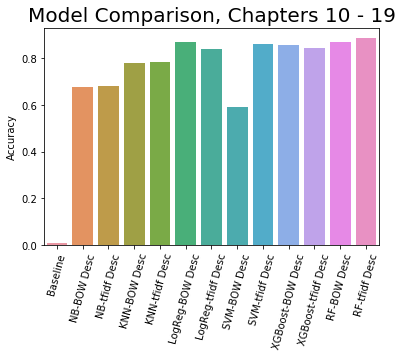

In [25]:
ax = sns.barplot(x=results.index, y=results["Accuracy"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=75)
plt.title("Model Comparison, Chapters 10 - 19", size=20)

In [26]:
results.to_csv('ModelResults_Chps_10_19'+ '03032021' + '.csv', index=False)